In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import classification_report, roc_curve, average_precision_score, precision_recall_curve, roc_auc_score



In [2]:
train = pd.read_csv('train.csv/train.csv')
test = pd.read_csv('test.csv/test.csv')

print("shape of the train", train.shape)
print("shape of the test", test.shape)


shape of the train (26570, 26)
shape of the test (20775, 25)


In [3]:
print("number of unique rows in train",len(train["id"].unique()))
print("number of unique rows in test", len(test["id"].unique()))

number of unique rows in train 26570
number of unique rows in test 20775


In [4]:
train.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0


In [5]:
train.product_code.value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

In [6]:
train.attribute_0.value_counts()

material_7    21320
material_5     5250
Name: attribute_0, dtype: int64

In [7]:
test.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.07,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037


In [8]:
test.product_code.value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

In [9]:
test.attribute_0.value_counts()

material_5    10529
material_7    10246
Name: attribute_0, dtype: int64

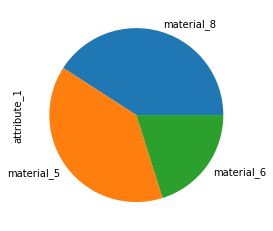

In [10]:
train.attribute_1.value_counts().plot.pie();

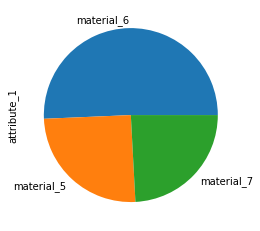

In [11]:
test.attribute_1.value_counts().plot.pie();

In [12]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

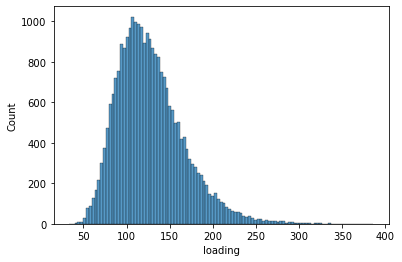

In [13]:
sns.histplot(data=train, x="loading");

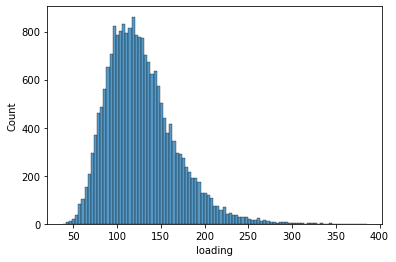

In [14]:
sns.histplot(data=test, x="loading");

In [15]:
# Droping the product_Code as this feature is have equal categories in train and test
train.drop("product_code", axis=1, inplace=True)
test.drop("product_code", axis=1, inplace=True)


In [16]:
train.dtypes

id                  int64
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

In [17]:
#Let's fill the loading feature with median
#Median_loading = df["loading"].median()
# df["loading"].fillna(df["loading"].mean(), inplace=True) filling with single columns
# df.apply(lambda x: x.fillna(x.mean(), axis=0))
for i in train.columns[train.isnull().any(axis=0)]:
    train[i].fillna(train[i].mean(), inplace=True)

for i in test.columns[test.isnull().any(axis=0)]:
    test[i].fillna(test[i].mean(), inplace=True)
    

In [18]:
test.isnull().sum()

id                0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [19]:
#split the attribute_2 and attribute_3
train["attribute_0"] = pd.factorize(train.attribute_0)[0]
train["attribute_1"] = pd.factorize(train.attribute_1)[0]

test["attribute_0"] = pd.factorize(test.attribute_0)[0]
test["attribute_1"] = pd.factorize(test.attribute_1)[0]

#df["product_code"] = pd.factorize(df.product_code)[0]


In [20]:
train.failure.value_counts()

0    20921
1     5649
Name: failure, dtype: int64

In [21]:
X = train.drop("failure", axis=1)
y = train["failure"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_SS = sc.fit_transform(X_train)
X_test_SS = sc.transform(X_test)


In [24]:
cols = X_train.columns
cols

Index(['id', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_SS)
X_test_pca = pca.transform(X_test_SS)
X_train_pca

array([[-1.09525832, -1.60704929, -1.18270956, ..., -0.16648211,
         0.55053714, -0.02846637],
       [-0.5185661 ,  3.72637072, -1.56909089, ..., -0.70245946,
         0.57047318,  0.11359982],
       [ 0.0832166 ,  0.62357754, -1.36207688, ...,  0.73845976,
         0.39820883,  0.20349456],
       ...,
       [ 0.21950207, -2.50988761,  2.84619331, ..., -0.8139973 ,
         0.24019763, -0.19406196],
       [-0.75561957, -3.4430695 ,  0.27745283, ..., -0.35361322,
        -0.40043001,  0.19036928],
       [ 3.2456811 ,  1.80610053, -0.91245081, ..., -0.07295792,
         0.06125142, -0.02066356]])

In [26]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.13297727, 0.07538611, 0.07057693, 0.0524674 , 0.04685892,
       0.04587489, 0.04273011, 0.04217053, 0.04204453, 0.04170266,
       0.04145525, 0.04104333, 0.04079235, 0.04017463, 0.03863355,
       0.03746208, 0.03532557, 0.03385826, 0.03052647, 0.02918766,
       0.02365186, 0.00838643, 0.00587573, 0.00083749])

In [27]:
n_estimators = 69
max_depth = 15

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)

random_forest.fit(X_train_pca, y_train)


predict = random_forest.predict(X_train_pca)

print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = random_forest.predict(X_test_pca)
print("test accurancy", accuracy_score(y_test, pred_test))
print("test number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print('Classification report:\n', classification_report(y_test, pred_test))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_test))

print("F1 Score: {}".format(f1_score(y_test, pred_test)))
print("Recall score: {}".format(recall_score(y_test, pred_test)))
print("Precision score: {}".format(precision_score(y_test, pred_test)))
print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.8195333082423786
Train number of correctly predicted 17420
test accurancy 0.7937523522770041
test number of correctly predicted 4218
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4217
           1       1.00      0.00      0.00      1097

    accuracy                           0.79      5314
   macro avg       0.90      0.50      0.44      5314
weighted avg       0.84      0.79      0.70      5314

Confusion matrix:
 [[4217    0]
 [1096    1]]
F1 Score: 0.0018214936247723133
Recall score: 0.0009115770282588879
Precision score: 1.0
AUC score: 0.5004557885141294


In [36]:
gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
gradient_boosting.fit(X_train_pca, y_train)

pred = gradient_boosting.predict(X_train_pca)

print("Train accurancy", accuracy_score(y_train, pred))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gradient_boosting.predict(X_test_pca)
print("test accurancy", accuracy_score(y_test, pred_test))
print("test number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print('Classification report:\n', classification_report(y_test, pred_test))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_test))

print("F1 Score: {}".format(f1_score(y_test, pred_test)))
print("Recall score: {}".format(recall_score(y_test, pred_test)))
print("Precision score: {}".format(precision_score(y_test, pred_test)))
print(confusion_matrix(y_test, pred_test))
print("Precision score: {}".format(precision_score(y_test, pred_test)))
print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.9993884079789236
Train number of correctly predicted 17257
test accurancy 0.7914941663530297
test number of correctly predicted 4206
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      4217
           1       0.42      0.03      0.05      1097

    accuracy                           0.79      5314
   macro avg       0.61      0.51      0.47      5314
weighted avg       0.72      0.79      0.71      5314

Confusion matrix:
 [[4176   41]
 [1067   30]]
F1 Score: 0.05136986301369863
Recall score: 0.027347310847766638
Precision score: 0.4225352112676056
[[4176   41]
 [1067   30]]
Precision score: 0.4225352112676056
AUC score: 0.508812379635408


In [30]:
#The RandomTreesEmbedding is an unsupervised method and thus does not required to be trained independently.
from sklearn.ensemble import RandomTreesEmbedding

random_tree_embedding = RandomTreesEmbedding(n_estimators=n_estimators, max_depth=max_depth, random_state=10)

random_tree_embedding.fit(X_train_pca, y_train)

# predict = random_tree_embedding.predict(X_train)

RandomTreesEmbedding(max_depth=15, n_estimators=69, random_state=10)

In [37]:
# Now, we will create three pipelines that will use the above embedding as a preprocessing stage.

# The random trees embedding can be directly pipelined with the logistic regression because it is a standard scikit-learn transformer.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=100, penalty="l2"))
rt_model.fit(X_train, y_train)

# predict = rt_model.predict(X_train)

# from sklearn.metrics import accuracy_score
# print("Train accurancy", accuracy_score(y_train, predict))
# #If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
# print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

# pred_test = rt_model.predict(X_test)
# print("Train accurancy", accuracy_score(y_test, pred_test))
# print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))


C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('randomtreesembedding',
                 RandomTreesEmbedding(max_depth=15, n_estimators=69,
                                      random_state=10)),
                ('logisticregression', LogisticRegression())])

In [48]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

def rf_apply(X, model):
    return model.apply(X)


rf_leaves_yielder = FunctionTransformer(rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(C=1, penalty='l1', max_iter=10001, class_weight='balanced', solver="liblinear"),
)
rf_model.fit(X_train_pca, y_train)

predict = rf_model.predict(X_train_pca)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = rf_model.predict(X_test_pca)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print(confusion_matrix(y_test, pred_test))
print("Precision score: {}".format(precision_score(y_test, pred_test)))
print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.5490214527662778
Train number of correctly predicted 11670
Train accurancy 0.5472337222431314
Train number of correctly predicted 2908
[[2303 1914]
 [ 492  605]]
Precision score: 0.24017467248908297
AUC score: 0.5488134691180314


In [47]:
def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]

gbdt_leaves_yielder = FunctionTransformer(gbdt_apply, kw_args={"model": gradient_boosting}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000,tol=0.2, C=0.005, penalty='l2'),
)
gbdt_model.fit(X_train_pca, y_train)

predict = gbdt_model.predict(X_train_pca)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gbdt_model.predict(X_test_pca)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print(confusion_matrix(y_test, pred_test))
print("Precision score: {}".format(precision_score(y_test, pred_test)))
print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.8337881068874671
Train number of correctly predicted 17723
Train accurancy 0.7903650733910426
Train number of correctly predicted 4200
[[4192   25]
 [1089    8]]
Precision score: 0.24242424242424243
AUC score: 0.5006821155590873


C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomTreesEmbedding was fitted with feature names
  warnings.warn(


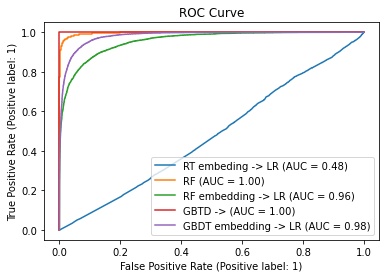

In [40]:
#We can finally show the different ROC curves for all the models.
#from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embeding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBTD ->", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]



model_displays = {}
for name, pipeline in models:
    model_displays['name'] = RocCurveDisplay.from_estimator(
        pipeline, X_train_pca, y_train, ax=ax, name=name
    )
    
_ = ax.set_title("ROC Curve");

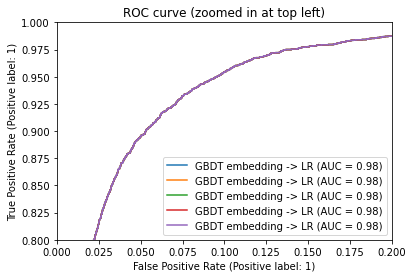

In [41]:
fig, ax = plt.subplots()
for name, pipeline in models:
    model_displays["name"].plot(ax=ax)

ax.set_xlim(0, 0.2)
ax.set_ylim(0.8, 1)
_ = ax.set_title("ROC curve (zoomed in at top left)")

C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomTreesEmbedding was fitted with feature names
  warnings.warn(


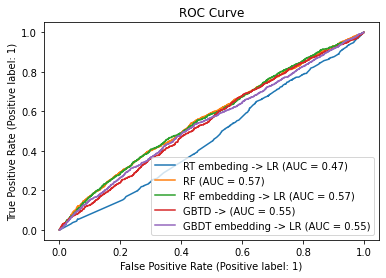

In [42]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embeding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBTD ->", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]



model_displays = {}
for name, pipeline in models:
    model_displays['name'] = RocCurveDisplay.from_estimator(
        pipeline, X_test_pca, y_test, ax=ax, name=name
    )
    
_ = ax.set_title("ROC Curve");

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

In [43]:
#from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

#power = PowerTransformer(method='yeo-johnson', standardize=True)
pt = PowerTransformer(method="yeo-johnson", standardize=False)
x_train_pt = pt.fit_transform(X_train)
x_test_pt = pt.transform(X_test)


In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)

random_forest.fit(x_train_pt, y_train)


predict = random_forest.predict(x_train_pt)

print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = random_forest.predict(x_test_pt)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.8112532931878058
Train number of correctly predicted 17244
Train accurancy 0.7935641701166729
Train number of correctly predicted 4217
AUC score: 0.5


In [83]:
gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
gradient_boosting.fit(x_train_pt, y_train)

pred = gradient_boosting.predict(x_train_pt)

print("Train accurancy", accuracy_score(y_train, pred))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gradient_boosting.predict(x_test_pt)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

Train accurancy 1.0
Train number of correctly predicted 19128
Train accurancy 0.7834023334587881
Train number of correctly predicted 4163


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.fit_transform(X_test)

In [94]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)

random_forest.fit(X_train_ss, y_train)


predict = random_forest.predict(X_train_ss)

print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = random_forest.predict(X_test_ss)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

Train accurancy 0.8999811817839669
Train number of correctly predicted 19130
Train accurancy 0.7869777945050809
Train number of correctly predicted 4182


In [95]:
gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
gradient_boosting.fit(X_train_ss, y_train)

pred = gradient_boosting.predict(X_train_ss)

print("Train accurancy", accuracy_score(y_train, pred))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gradient_boosting.predict(X_test_ss)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

Train accurancy 1.0
Train number of correctly predicted 19130
Train accurancy 0.7835905156191193
Train number of correctly predicted 4164


In [91]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train_mms = min_max_scaler.fit_transform(X_train)
X_test_mms = min_max_scaler.fit_transform(X_test)

In [92]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)

random_forest.fit(X_train_mms, y_train)


predict = random_forest.predict(X_train_mms)

print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = random_forest.predict(X_test_mms)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

Train accurancy 0.8997929996236357
Train number of correctly predicted 19126
Train accurancy 0.7877305231464057
Train number of correctly predicted 4186


In [96]:
gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=10)
gradient_boosting.fit(X_train_mms, y_train)

pred = gradient_boosting.predict(X_train_mms)

print("Train accurancy", accuracy_score(y_train, pred))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gradient_boosting.predict(X_test_mms)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

Train accurancy 1.0
Train number of correctly predicted 19130
Train accurancy 0.7773805043281897
Train number of correctly predicted 4131


In [98]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

def rf_apply(X, model):
    return model.apply(X)


rf_leaves_yielder = FunctionTransformer(rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000,tol=0.2, C=0.0001, penalty='l2'),
)
rf_model.fit(X_train_mms, y_train)

predict = rf_model.predict(X_train_mms)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = rf_model.predict(X_test_mms)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))


Train accurancy 0.7874012043658262
Train number of correctly predicted 16737
Train accurancy 0.7873541588257433
Train number of correctly predicted 4184


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


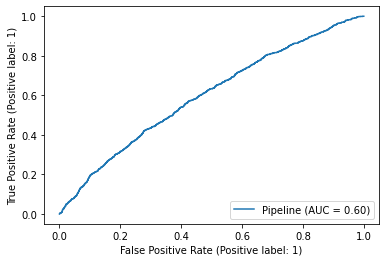

In [100]:
from sklearn.metrics import plot_roc_curve

rf_disp = plot_roc_curve(rf_model, X_test_mms, y_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
clf = SVC(decision_function_shape="ovo", probability=True).fit(X_train_mms, y_train)
print(roc_auc_score(y_train, clf.predict_proba(X_train_mms), multi_class="ovo"))

In [50]:

from lightgbm import LGBMClassifier

model2 = LGBMClassifier(**{'seed': 42, 'n_jobs': -1, 'lambda_l2': 2, 'metric': "auc", 'max_depth': -1,
                           'num_leaves': 100, 'boosting': 'gbdt', 'bagging_freq': 10, 'learning_rate': 0.01,
                           'objective': 'binary', 'min_data_in_leaf': 40, 'num_boost_round': 70,
                           'feature_fraction': 0.90, 'bagging_fraction': 0.90})

model2.fit(X_train_pca, y_train)
predict = model2.predict(X_train_pca)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=70, num_boost_round=70 will be ignored. Current value: num_iterations=70
Train accurancy 0.7858487015430937
Train number of correctly predicted 16704


In [51]:
pred_test = model2.predict(X_test_pca)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print(confusion_matrix(y_test, pred_test))
print("Precision score: {}".format(precision_score(y_test, pred_test)))
print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.7935641701166729
Train number of correctly predicted 4217
[[4217    0]
 [1097    0]]
Precision score: 0.0
AUC score: 0.5


C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
